<a href="https://colab.research.google.com/github/elazzaouisofiane/01DataMiningTest/blob/main/11KMeansPartitionClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
home_data = pd.read_csv('/content/california_housing_train.csv', usecols = ['total_rooms', 'total_bedrooms', 'median_house_value'])
home_data.head()

,total_rooms,total_bedrooms,median_house_value
0,5612.0,1283.0,66900.0
1,7650.0,1901.0,80100.0
2,720.0,174.0,85700.0
3,1501.0,337.0,73400.0
4,1454.0,326.0,65500.0


<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

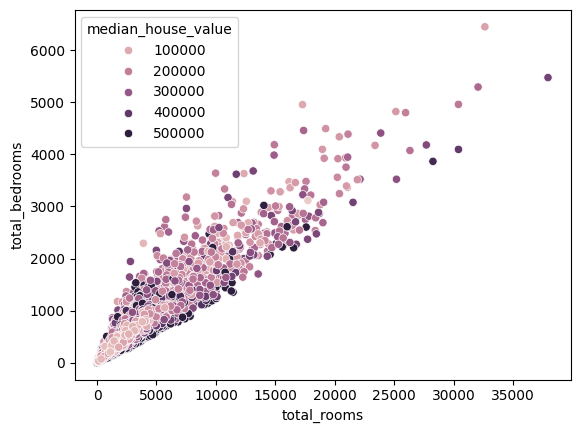

In [ ]:
import seaborn as sns
sns.scatterplot(data = home_data, x = 'total_rooms', y = 'total_bedrooms', hue = 'median_house_value')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['total_rooms', 'total_bedrooms']], home_data[['median_house_value']],test_size=0.33, random_state=0)

from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

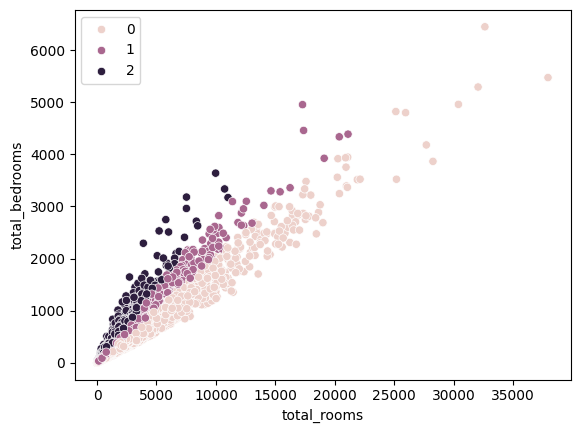

In [ ]:
sns.scatterplot(data = X_train, x = 'total_rooms', y = 'total_bedrooms', hue = kmeans.labels_)

In [ ]:
from sklearn.metrics import silhouette_score

K = range(7, 8)

fits = []

score = []



for k in K:

  model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

  fits.append (model)

  score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

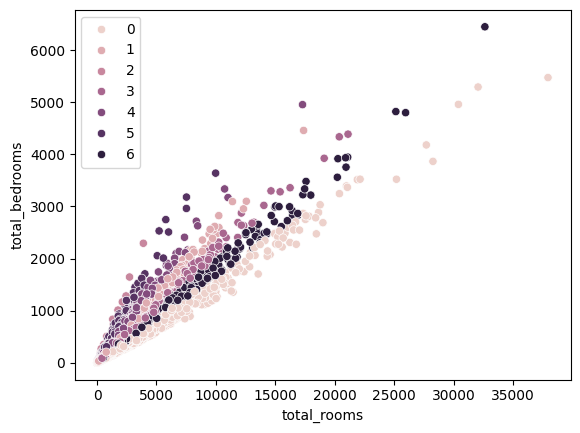

In [ ]:
sns.scatterplot(data = X_train, x = 'total_rooms', y = 'total_bedrooms', hue = fits[0].labels_)

<Axes: >

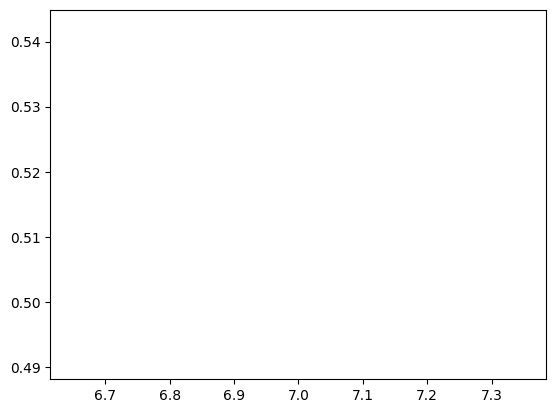

In [ ]:
sns.lineplot(x = K, y = score)